# Machine Learning Calving Day Prediction Final Version- 02

## Section 02: Prediction of Day Before Calving and Calving Day [Day = -1, & Day = 0]

### Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import itertools 
import warnings 
warnings.filterwarnings(action='ignore')
from datetime import datetime
import os 
import re

### Loading the data set

In [2]:
# Reading the dataset
df = pd.read_csv("calving_data_version_02.csv")

In [3]:
# Check first five rows of data
df.head()

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy 1,Expected Calving Days,Expected Calving Days 1,Heat Indicator,Cow ID,...,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days Before Calving,Hours Before Calving,Calved
0,10-Dec-21,24-Dec-21,8:04,16-Mar-21,269,269.0,11,11,8,3,...,141,735,29,1.7,Normal,1,multiparous,-14,-360,0
1,11-Dec-21,24-Dec-21,8:04,16-Mar-21,270,270.0,10,10,-2,3,...,131,827,32,1.5,Normal,1,multiparous,-13,-336,0
2,12-Dec-21,24-Dec-21,8:04,16-Mar-21,271,271.0,9,9,8,3,...,144,660,31,2.1,Normal,1,multiparous,-12,-312,0
3,13-Dec-21,24-Dec-21,8:04,16-Mar-21,272,272.0,8,8,-2,3,...,134,724,31,1.9,Normal,1,multiparous,-11,-264,0
4,14-Dec-21,24-Dec-21,8:04,16-Mar-21,273,273.0,7,7,-6,3,...,129,742,31,1.9,Normal,1,multiparous,-10,-240,0


In [4]:
# Last fives rows of data set
df.tail()

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy 1,Expected Calving Days,Expected Calving Days 1,Heat Indicator,Cow ID,...,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days Before Calving,Hours Before Calving,Calved
4450,17-Aug-22,21-Aug-22,15:33,1-Dec-21,259,259.0,21,21,-6,1744,...,200,463,77,4.8,Normal,1,primiparous,-4,-96,0
4451,18-Aug-22,21-Aug-22,15:33,1-Dec-21,260,260.0,20,20,-1,1744,...,219,384,55,5.8,Normal,1,primiparous,-3,-72,0
4452,19-Aug-22,21-Aug-22,15:33,1-Dec-21,261,261.0,19,19,-1,1744,...,214,454,76,4.1,Normal,1,primiparous,-2,-48,0
4453,20-Aug-22,21-Aug-22,15:33,1-Dec-21,262,262.0,18,18,6,1744,...,229,471,52,4.4,Normal,1,primiparous,-1,-24,2
4454,21-Aug-22,21-Aug-22,15:33,1-Dec-21,263,263.0,17,17,-1,1744,...,303,--,--,--,Normal,1,primiparous,0,0,1


In [5]:
# Shape of the data set
df.shape

(4455, 25)

## Cleaing section

In [6]:
# Replace non-numeric values
df = df.replace("--", np.nan, regex=True)
df = df.replace(r'^\s*$', np.nan, regex=True)

In [7]:
# Missing values inside the dataset
df.isnull().sum().sort_values(ascending=False) 

Days Pregnancy 1              1613
Restlessness Ratio               2
Rest Per Bout                    2
Rest Time                        2
Date                             0
Lact No                          0
Hours Before Calving             0
Days Before Calving              0
Parity                           0
Offspring                        0
Manner Of Calving                0
Activity                         0
Lactation No                     0
Breed                            0
Calving Date                     0
Calving Season                   0
Month of Sensor Attachment       0
Cow ID                           0
Heat Indicator                   0
Expected Calving Days 1          0
Expected Calving Days            0
Days Pregnancy                   0
Insemination Date                0
Calving Time                     0
Calved                           0
dtype: int64

## Visluzation of NAN value through heat map

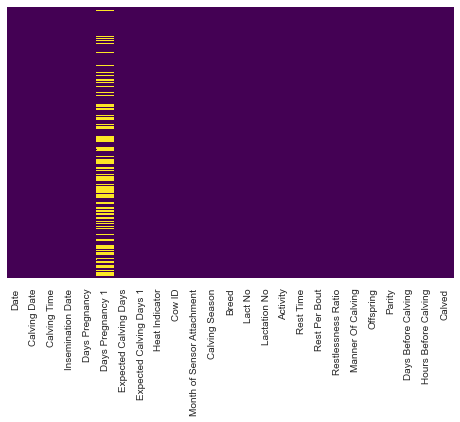

In [8]:
# Setting the background style for chart
sns.set_style('white')
# Setting the figure size
sns.set(rc={'figure.figsize':(8,5)})
# Generating the heatmap to check the NAN values inside the dataset
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# Setting the x ticks for chart
plt.xticks(fontsize=10, rotation='vertical')
# Show the chart
plt.show()

In [9]:
# verifying missing values inside the dataset
df.isnull().sum().sort_values(ascending=True)

Date                             0
Days Before Calving              0
Parity                           0
Offspring                        0
Manner Of Calving                0
Activity                         0
Lactation No                     0
Lact No                          0
Hours Before Calving             0
Calving Season                   0
Breed                            0
Cow ID                           0
Heat Indicator                   0
Expected Calving Days 1          0
Expected Calving Days            0
Days Pregnancy                   0
Insemination Date                0
Calving Time                     0
Calving Date                     0
Month of Sensor Attachment       0
Calved                           0
Rest Time                        2
Rest Per Bout                    2
Restlessness Ratio               2
Days Pregnancy 1              1613
dtype: int64

## Imputation of missing values

### Libraries

In [10]:
# libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score
from sklearn.preprocessing import LabelEncoder

In [11]:
# selection of variables with missing values
columns_with_missing_values = ['Rest Time', 'Rest Per Bout', 'Restlessness Ratio']

# Performing multiple imputation techniques to impute the variables with the missing values
imputer_mice = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df[columns_with_missing_values] = imputer_mice.fit_transform(df[columns_with_missing_values].astype(float))

## Conversion of Data types

In [12]:
# Converting date columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Calving Date'] = pd.to_datetime(df['Calving Date'])
df['Insemination Date'] = pd.to_datetime(df['Insemination Date'])

# Converting datetime columns to numerical datatype
df['Date'] = df['Date'].apply(lambda x: x.timestamp()).astype(int)
df['Calving Date'] = df['Calving Date'].apply(lambda x: x.timestamp()).astype(int)
df['Insemination Date'] = df['Insemination Date'].apply(lambda x: x.timestamp()).astype(int)

## Encoding Categorical variables

In [13]:
# Encoding the categorical variables 
label_encoder = LabelEncoder()
df['Calving Time'] = label_encoder.fit_transform(df['Calving Time'])
df['Days Pregnancy 1'] = label_encoder.fit_transform(df['Days Pregnancy 1'])
df['Calving Season'] = label_encoder.fit_transform(df['Calving Season'])
df['Breed'] = label_encoder.fit_transform(df['Breed'])
df['Lact No'] = label_encoder.fit_transform(df['Lact No'])
df['Lactation No'] = label_encoder.fit_transform(df['Lactation No'])
df['Manner Of Calving'] = label_encoder.fit_transform(df['Manner Of Calving'])
df['Parity'] = label_encoder.fit_transform(df['Parity'])

## Feature selection

In [166]:
# Independent variables of dataset
X = df[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No', 'Month of Sensor Attachment']]

# Dependent variable of dataset
y = df['Calved']

## Spliting data set

In [167]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4455)

## Feature Scaling

In [168]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  Random Forest

In [156]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest.predict(X_test_scaled)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

# Calculating evaluation metrics
# Sensitivity, Specificity, PPV, NPV, Accuracy, F2 Score
random_forest_sensitivity = random_forest_conf_matrix[1, 1] / (random_forest_conf_matrix[1, 1] + random_forest_conf_matrix[1, 0]) * 100
random_forest_specificity = random_forest_conf_matrix[0, 0] / (random_forest_conf_matrix[0, 0] + random_forest_conf_matrix[0, 1]) * 100
random_forest_ppv = random_forest_conf_matrix[1, 1] / (random_forest_conf_matrix[1, 1] + random_forest_conf_matrix[0, 1]) * 100
random_forest_npv = random_forest_conf_matrix[0, 0] / (random_forest_conf_matrix[0, 0] + random_forest_conf_matrix[1, 0]) * 100
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions) * 100
# Calculating F2 score for Random Forest
beta = 2
random_forest_f2 = fbeta_score(y_test, random_forest_predictions, beta=beta, average='weighted') * 100

## Printing Results

In [157]:
# Printing results for Random Forest with F2 score
print('Random Forest:')
print('Confusion Matrix:')
print(random_forest_conf_matrix)
print('Sensitivity: {:.2f}%'.format(random_forest_sensitivity))
print('Specificity: {:.2f}%'.format(random_forest_specificity))
print('Positive Predictive Value: {:.2f}%'.format(random_forest_ppv))
print('Negative Predictive Value: {:.2f}%'.format(random_forest_npv))
print('Accuracy Score: {:.2f}%'.format(random_forest_accuracy))
print('F2 Score: {:.2f}%'.format(random_forest_f2))
print()

Random Forest:
Confusion Matrix:
[[775  10   0]
 [ 29  24   2]
 [ 44   5   2]]
Sensitivity: 45.28%
Specificity: 98.73%
Positive Predictive Value: 70.59%
Negative Predictive Value: 96.39%
Accuracy Score: 89.90%
F2 Score: 88.74%



# Gradient Boosting

In [169]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test_scaled)
gradient_boosting_conf_matrix = confusion_matrix(y_test, gradient_boosting_predictions)

# Calculating evaluation metrics
# Sensitivity, Specificity, PPV, NPV, Accuracy, F1 Score, F2 Score
gradient_boosting_sensitivity = gradient_boosting_conf_matrix[1, 1] / (gradient_boosting_conf_matrix[1, 1] + gradient_boosting_conf_matrix[1, 0]) * 100
gradient_boosting_specificity = gradient_boosting_conf_matrix[0, 0] / (gradient_boosting_conf_matrix[0, 0] + gradient_boosting_conf_matrix[0, 1]) * 100
gradient_boosting_ppv = gradient_boosting_conf_matrix[1, 1] / (gradient_boosting_conf_matrix[1, 1] + gradient_boosting_conf_matrix[0, 1]) * 100
gradient_boosting_npv = gradient_boosting_conf_matrix[0, 0] / (gradient_boosting_conf_matrix[0, 0] + gradient_boosting_conf_matrix[1, 0]) * 100
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions) * 100
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_predictions, average='weighted') * 100
# Calculating F2 score for Gradient Boosting
beta = 2
gradient_boosting_f2 = fbeta_score(y_test, gradient_boosting_predictions, beta=beta, average='weighted') * 100

## Printing Results

In [170]:
# Printing results for Gradient Boosting with F1 and F2 scores
print('Gradient Boosting:')
print('Confusion Matrix:')
print(gradient_boosting_conf_matrix)
print('Sensitivity: {:.2f}%'.format(gradient_boosting_sensitivity))
print('Specificity: {:.2f}%'.format(gradient_boosting_specificity))
print('Positive Predictive Value: {:.2f}%'.format(gradient_boosting_ppv))
print('Negative Predictive Value: {:.2f}%'.format(gradient_boosting_npv))
print('Accuracy Score: {:.2f}%'.format(gradient_boosting_accuracy))
print('F1 Score: {:.2f}%'.format(gradient_boosting_f1))
print('F2 Score: {:.2f}%'.format(gradient_boosting_f2))
print()

Gradient Boosting:
Confusion Matrix:
[[772  10   3]
 [ 32  20   3]
 [ 45   5   1]]
Sensitivity: 38.46%
Specificity: 98.72%
Positive Predictive Value: 66.67%
Negative Predictive Value: 96.02%
Accuracy Score: 89.00%
F1 Score: 86.19%
F2 Score: 87.81%



## Decision Tree

In [126]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree.predict(X_test_scaled)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)

# Sensitivity
decision_tree_sensitivity = decision_tree_conf_matrix[1, 1] / (decision_tree_conf_matrix[1, 1] + decision_tree_conf_matrix[1, 0]) * 100
# Specificity
decision_tree_specificity = decision_tree_conf_matrix[0, 0] / (decision_tree_conf_matrix[0, 0] + decision_tree_conf_matrix[0, 1]) * 100
# Positive Predictive Value (PPV)
decision_tree_ppv = decision_tree_conf_matrix[1, 1] / (decision_tree_conf_matrix[1, 1] + decision_tree_conf_matrix[0, 1]) * 100
# Negative Predictive Value (NPV)
decision_tree_npv = decision_tree_conf_matrix[0, 0] / (decision_tree_conf_matrix[0, 0] + decision_tree_conf_matrix[1, 0]) * 100
# Accuracy
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions) * 100
# F1 Score
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted') * 100
# F2 Score
beta = 2
decision_tree_f2 = fbeta_score(y_test, decision_tree_predictions, beta=beta, average='weighted') * 100

## Printing results

In [127]:
# Printing results for Decision Tree (DT) with F1 and F2 scores
print('Decision Tree:')
print('Confusion Matrix:')
print(decision_tree_conf_matrix)
print('Sensitivity: {:.2f}%'.format(decision_tree_sensitivity))
print('Specificity: {:.2f}%'.format(decision_tree_specificity))
print('Positive Predictive Value: {:.2f}%'.format(decision_tree_ppv))
print('Negative Predictive Value: {:.2f}%'.format(decision_tree_npv))
print('Accuracy Score: {:.2f}%'.format(decision_tree_accuracy))
print('F1 Score: {:.2f}%'.format(decision_tree_f1))
print('F2 Score: {:.2f}%'.format(decision_tree_f2))
print()

Decision Tree:
Confusion Matrix:
[[695  39  51]
 [ 25  23   7]
 [ 40   8   3]]
Sensitivity: 47.92%
Specificity: 94.69%
Positive Predictive Value: 37.10%
Negative Predictive Value: 96.53%
Accuracy Score: 80.92%
F1 Score: 81.84%
F2 Score: 81.27%



## Naive Bayes

In [139]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)

# Sensitivity
naive_bayes_sensitivity = naive_bayes_conf_matrix[1, 1] / (naive_bayes_conf_matrix[1, 1] + naive_bayes_conf_matrix[1, 0]) * 100
# Specificity
naive_bayes_specificity = naive_bayes_conf_matrix[0, 0] / (naive_bayes_conf_matrix[0, 0] + naive_bayes_conf_matrix[0, 1]) * 100
# Positive Predictive Value (PPV)
naive_bayes_ppv = naive_bayes_conf_matrix[1, 1] / (naive_bayes_conf_matrix[1, 1] + naive_bayes_conf_matrix[0, 1]) * 100
# Negative Predictive Value (NPV)
naive_bayes_npv = naive_bayes_conf_matrix[0, 0] / (naive_bayes_conf_matrix[0, 0] + naive_bayes_conf_matrix[1, 0]) * 100
# Accuracy
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions) * 100
# F1 Score
naive_bayes_f1 = f1_score(y_test, naive_bayes_predictions, average='weighted') * 100
# F2 Score
beta = 2
naive_bayes_f2 = fbeta_score(y_test, naive_bayes_predictions, beta=beta, average='weighted') * 100

## Printing results

In [140]:
# Printing results for Naive Bayes with F1 and F2 scores
print('Naive Bayes:')
print('Confusion Matrix:')
print(naive_bayes_conf_matrix)
print('Sensitivity: {:.2f}%'.format(naive_bayes_sensitivity))
print('Specificity: {:.2f}%'.format(naive_bayes_specificity))
print('Positive Predictive Value: {:.2f}%'.format(naive_bayes_ppv))
print('Negative Predictive Value: {:.2f}%'.format(naive_bayes_npv))
print('Accuracy Score: {:.2f}%'.format(naive_bayes_accuracy))
print('F1 Score: {:.2f}%'.format(naive_bayes_f1))
print('F2 Score: {:.2f}%'.format(naive_bayes_f2))
print()

Naive Bayes:
Confusion Matrix:
[[745  19  21]
 [ 26  25   4]
 [ 41   8   2]]
Sensitivity: 49.02%
Specificity: 97.51%
Positive Predictive Value: 56.82%
Negative Predictive Value: 96.63%
Accuracy Score: 86.64%
F1 Score: 85.38%
F2 Score: 86.13%



## Neural Network

In [151]:
# Neural Network (Multilayer Perceptron)
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
mlp_predictions = mlp.predict(X_test_scaled)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)

# Sensitivity
mlp_sensitivity = mlp_conf_matrix[1, 1] / (mlp_conf_matrix[1, 1] + mlp_conf_matrix[1, 0]) * 100
# Specificity
mlp_specificity = mlp_conf_matrix[0, 0] / (mlp_conf_matrix[0, 0] + mlp_conf_matrix[0, 1]) * 100
# Positive Predictive Value (PPV)
mlp_ppv = mlp_conf_matrix[1, 1] / (mlp_conf_matrix[1, 1] + mlp_conf_matrix[0, 1]) * 100
# Negative Predictive Value (NPV)
mlp_npv = mlp_conf_matrix[0, 0] / (mlp_conf_matrix[0, 0] + mlp_conf_matrix[1, 0]) * 100
# Accuracy
mlp_accuracy = accuracy_score(y_test, mlp_predictions) * 100
# F1 Score
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted') * 100
# F2 Score
beta = 2
mlp_f2 = fbeta_score(y_test, mlp_predictions, beta=beta, average='weighted') * 100

## Printing Results

In [152]:
# Printing results for Multilayer Perceptron with F1 and F2 scores
print('Neural Network (Multilayer Perceptron):')
print('Confusion Matrix:')
print(mlp_conf_matrix)
print('Sensitivity: {:.2f}%'.format(mlp_sensitivity))
print('Specificity: {:.2f}%'.format(mlp_specificity))
print('Positive Predictive Value: {:.2f}%'.format(mlp_ppv))
print('Negative Predictive Value: {:.2f}%'.format(mlp_npv))
print('Accuracy Score: {:.2f}%'.format(mlp_accuracy))
print('F1 Score: {:.2f}%'.format(mlp_f1))
print('F2 Score: {:.2f}%'.format(mlp_f2))
print()

Neural Network (Multilayer Perceptron):
Confusion Matrix:
[[776   9   0]
 [ 29  25   1]
 [ 46   5   0]]
Sensitivity: 46.30%
Specificity: 98.85%
Positive Predictive Value: 73.53%
Negative Predictive Value: 96.40%
Accuracy Score: 89.90%
F1 Score: 86.86%
F2 Score: 88.63%



## Logistic Regression

In [27]:
# Logistic Regression
logistic_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
logistic_reg.fit(X_train_scaled, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test_scaled)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_reg_predictions)

# Calculating evaluation metrics
# Sensitivity, Specificity, PPV, NPV, Accuracy, F2 Score
logistic_reg_sensitivity = logistic_reg_conf_matrix[1, 1] / (logistic_reg_conf_matrix[1, 1] + logistic_reg_conf_matrix[1, 0]) * 100
logistic_reg_specificity = logistic_reg_conf_matrix[0, 0] / (logistic_reg_conf_matrix[0, 0] + logistic_reg_conf_matrix[0, 1]) * 100
logistic_reg_ppv = logistic_reg_conf_matrix[1, 1] / (logistic_reg_conf_matrix[1, 1] + logistic_reg_conf_matrix[0, 1]) * 100
logistic_reg_npv = logistic_reg_conf_matrix[0, 0] / (logistic_reg_conf_matrix[0, 0] + logistic_reg_conf_matrix[1, 0]) * 100
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions) * 100
# Calculating F2 score for Logistic Regression
beta = 2
logistic_reg_f2 = fbeta_score(y_test, logistic_reg_predictions, beta=beta, average='weighted') * 100


## Printing Results

In [28]:
# Printing results for Logistic Regression
print('Logistic Regression (Different Values for Day Before and Day of Calving):')
print('Confusion Matrix:')
print(logistic_reg_conf_matrix)
print('Sensitivity: {:.2f}%'.format(logistic_reg_sensitivity))
print('Specificity: {:.2f}%'.format(logistic_reg_specificity))
print('Positive Predictive Value: {:.2f}%'.format(logistic_reg_ppv))
print('Negative Predictive Value: {:.2f}%'.format(logistic_reg_npv))
print('Accuracy Score: {:.2f}%'.format(logistic_reg_accuracy))
print('F2 Score: {:.2f}%'.format(logistic_reg_f2))

Logistic Regression (Different Values for Day Before and Day of Calving):
Confusion Matrix:
[[783   0   2]
 [ 42  13   0]
 [ 48   3   0]]
Sensitivity: 23.64%
Specificity: 100.00%
Positive Predictive Value: 100.00%
Negative Predictive Value: 94.91%
Accuracy Score: 89.34%
F2 Score: 87.65%


## Supprot Vector Machine (SVM)

In [29]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Calculating evaluation metrics
# Sensitivity, Specificity, PPV, NPV, Accuracy, F1 Score, F2 Score
svm_sensitivity = svm_conf_matrix[1, 1] / (svm_conf_matrix[1, 1] + svm_conf_matrix[1, 0]) * 100
svm_specificity = svm_conf_matrix[0, 0] / (svm_conf_matrix[0, 0] + svm_conf_matrix[0, 1]) * 100
svm_ppv = svm_conf_matrix[1, 1] / (svm_conf_matrix[1, 1] + svm_conf_matrix[0, 1]) * 100
svm_npv = svm_conf_matrix[0, 0] / (svm_conf_matrix[0, 0] + svm_conf_matrix[1, 0]) * 100
svm_accuracy = accuracy_score(y_test, svm_predictions) * 100
svm_f1 = f1_score(y_test, svm_predictions, average='weighted') * 100
# Calculating F2 score for Support Vector Machine (SVM)
beta = 2
svm_f2 = fbeta_score(y_test, svm_predictions, beta=beta, average='weighted') * 100

## Printing Results

In [30]:
# Printing results for Support Vector Machine (SVM) with F1 and F2 scores
print('Support Vector Machine (SVM):')
print('Confusion Matrix:')
print(svm_conf_matrix)
print('Sensitivity: {:.2f}%'.format(svm_sensitivity))
print('Specificity: {:.2f}%'.format(svm_specificity))
print('Positive Predictive Value: {:.2f}%'.format(svm_ppv))
print('Negative Predictive Value: {:.2f}%'.format(svm_npv))
print('Accuracy Score: {:.2f}%'.format(svm_accuracy))
print('F1 Score: {:.2f}%'.format(svm_f1))
print('F2 Score: {:.2f}%'.format(svm_f2))
print()

Support Vector Machine (SVM):
Confusion Matrix:
[[778   7   0]
 [ 36  19   0]
 [ 46   5   0]]
Sensitivity: 34.55%
Specificity: 99.11%
Positive Predictive Value: 73.08%
Negative Predictive Value: 95.58%
Accuracy Score: 89.45%
F1 Score: 86.06%
F2 Score: 88.02%



## K- Nearest Neighbor (KNN)

In [31]:
# K-nearest neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Calculating evaluation metrics
# Sensitivity, Specificity, PPV, NPV, Accuracy, F2 Score
knn_sensitivity = knn_conf_matrix[1, 1] / (knn_conf_matrix[1, 1] + knn_conf_matrix[1, 0]) * 100
knn_specificity = knn_conf_matrix[0, 0] / (knn_conf_matrix[0, 0] + knn_conf_matrix[0, 1]) * 100
knn_ppv = knn_conf_matrix[1, 1] / (knn_conf_matrix[1, 1] + knn_conf_matrix[0, 1]) * 100
knn_npv = knn_conf_matrix[0, 0] / (knn_conf_matrix[0, 0] + knn_conf_matrix[1, 0]) * 100
knn_accuracy = accuracy_score(y_test, knn_predictions) * 100
# Calculating F2 score for K-nearest neighbors (KNN)
beta = 2
knn_f2 = fbeta_score(y_test, knn_predictions, beta=beta, average='weighted') * 100

## Printing Results

In [32]:
# Printing results for K-nearest neighbors (KNN) with F2 score
print('K-Nearest Neighbors (KNN):')
print('Confusion Matrix:')
print(knn_conf_matrix)
print('Sensitivity: {:.2f}%'.format(knn_sensitivity))
print('Specificity: {:.2f}%'.format(knn_specificity))
print('Positive Predictive Value: {:.2f}%'.format(knn_ppv))
print('Negative Predictive Value: {:.2f}%'.format(knn_npv))
print('Accuracy Score: {:.2f}%'.format(knn_accuracy))
print('F2 Score: {:.2f}%'.format(knn_f2))
print()

K-Nearest Neighbors (KNN):
Confusion Matrix:
[[770  12   3]
 [ 35  16   4]
 [ 47   3   1]]
Sensitivity: 31.37%
Specificity: 98.47%
Positive Predictive Value: 57.14%
Negative Predictive Value: 95.65%
Accuracy Score: 88.33%
F2 Score: 87.07%



## Ada Boost

In [33]:
# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)
adaboost_predictions = adaboost.predict(X_test_scaled)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)

# Sensitivity
adaboost_sensitivity = adaboost_conf_matrix[1, 1] / (adaboost_conf_matrix[1, 1] + adaboost_conf_matrix[1, 0]) * 100
# Specificity
adaboost_specificity = adaboost_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + adaboost_conf_matrix[0, 1]) * 100
# Positive Predictive Value (PPV)
adaboost_ppv = adaboost_conf_matrix[1, 1] / (adaboost_conf_matrix[1, 1] + adaboost_conf_matrix[0, 1]) * 100
# Negative Predictive Value (NPV)
adaboost_npv = adaboost_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + adaboost_conf_matrix[1, 0]) * 100
# Accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions) * 100
# F1 Score
adaboost_f1 = f1_score(y_test, adaboost_predictions, average='weighted') * 100
# F2 Score
beta = 2
adaboost_f2 = fbeta_score(y_test, adaboost_predictions, beta=beta, average='weighted') * 100

## Printing Results

In [34]:
# Printing results for AdaBoost with F1 and F2 scores
print('AdaBoost:')
print('Confusion Matrix:')
print(adaboost_conf_matrix)
print('Sensitivity: {:.2f}%'.format(adaboost_sensitivity))
print('Specificity: {:.2f}%'.format(adaboost_specificity))
print('Positive Predictive Value: {:.2f}%'.format(adaboost_ppv))
print('Negative Predictive Value: {:.2f}%'.format(adaboost_npv))
print('Accuracy Score: {:.2f}%'.format(adaboost_accuracy))
print('F1 Score: {:.2f}%'.format(adaboost_f1))
print('F2 Score: {:.2f}%'.format(adaboost_f2))
print()

AdaBoost:
Confusion Matrix:
[[776   8   1]
 [ 38  13   4]
 [ 47   3   1]]
Sensitivity: 25.49%
Specificity: 98.98%
Positive Predictive Value: 61.90%
Negative Predictive Value: 95.33%
Accuracy Score: 88.66%
F1 Score: 85.30%
F2 Score: 87.22%



## Kernal Support Vector Machine (KSVM)

In [35]:
# Kernel Support Vector Machine (KSVM)
kernel_svm = SVC(kernel='rbf')
kernel_svm.fit(X_train_scaled, y_train)
kernel_svm_predictions = kernel_svm.predict(X_test_scaled)
kernel_svm_conf_matrix = confusion_matrix(y_test, kernel_svm_predictions)

# Sensitivity
kernel_svm_sensitivity = kernel_svm_conf_matrix[1, 1] / (kernel_svm_conf_matrix[1, 1] + kernel_svm_conf_matrix[1, 0]) * 100
# Specificity
kernel_svm_specificity = kernel_svm_conf_matrix[0, 0] / (kernel_svm_conf_matrix[0, 0] + kernel_svm_conf_matrix[0, 1]) * 100
# Positive Predictive Value (PPV)
kernel_svm_ppv = kernel_svm_conf_matrix[1, 1] / (kernel_svm_conf_matrix[1, 1] + kernel_svm_conf_matrix[0, 1]) * 100
# Negative Predictive Value (NPV)
kernel_svm_npv = kernel_svm_conf_matrix[0, 0] / (kernel_svm_conf_matrix[0, 0] + kernel_svm_conf_matrix[1, 0]) * 100
# Accuracy
kernel_svm_accuracy = accuracy_score(y_test, kernel_svm_predictions) * 100
# F1 Score
kernel_svm_f1 = f1_score(y_test, kernel_svm_predictions, average='weighted') * 100
# F2 Score
beta = 2
kernel_svm_f2 = fbeta_score(y_test, kernel_svm_predictions, beta=beta, average='weighted') * 100

## Printing Results

In [36]:
# Printing results for Kernel Support Vector Machine (KSVM) with F1 and F2 scores
print('Kernel Support Vector Machine (KSVM):')
print('Confusion Matrix:')
print(kernel_svm_conf_matrix)
print('Sensitivity: {:.2f}%'.format(kernel_svm_sensitivity))
print('Specificity: {:.2f}%'.format(kernel_svm_specificity))
print('Positive Predictive Value: {:.2f}%'.format(kernel_svm_ppv))
print('Negative Predictive Value: {:.2f}%'.format(kernel_svm_npv))
print('Accuracy Score: {:.2f}%'.format(kernel_svm_accuracy))
print('F1 Score: {:.2f}%'.format(kernel_svm_f1))
print('F2 Score: {:.2f}%'.format(kernel_svm_f2))
print()

Kernel Support Vector Machine (KSVM):
Confusion Matrix:
[[778   7   0]
 [ 36  19   0]
 [ 46   5   0]]
Sensitivity: 34.55%
Specificity: 99.11%
Positive Predictive Value: 73.08%
Negative Predictive Value: 95.58%
Accuracy Score: 89.45%
F1 Score: 86.06%
F2 Score: 88.02%



# Feature Selection

## Library

In [37]:
# Importing libraries
import shap
from sklearn.ensemble import RandomForestRegressor

## Selection of model

In [38]:
# Creating the model
model = RandomForestRegressor()

## Model fitting

In [39]:
# Fitting the model to the training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

## Explainer Object

In [40]:
# Creating an explainer object
explainer = shap.Explainer(model)

## Computation of SHAP values for all features

In [41]:
# Computing SHAP values for all features
shap_values = explainer(X_train_scaled)

## SHAP Plot

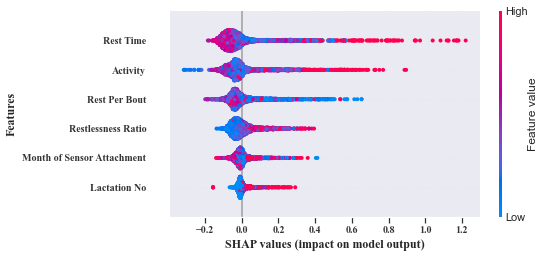

In [42]:
# Setting the figure size
plt.figure(figsize=(12, 10))

# Plotting SHAP summary plot with feature names
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, show=False)

# Setting font style 
plt.rcParams['font.family'] = 'Times New Roman'

# Customizing the appearance of the chart
plt.grid(True, linestyle=":", linewidth=0.25)

# Setting ticks, labels
plt.xticks(fontsize=10, weight='bold', fontname='Times New Roman') 
plt.yticks(fontsize=10, weight='bold', fontname='Times New Roman')  
plt.xlabel('SHAP values (impact on model output)', fontsize=12, weight='bold', fontname='Times New Roman')
plt.ylabel('Features', fontsize=12, weight='bold', fontname='Times New Roman')

# Saving the plot to a file
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Closing the plot
plt.close()

# Valadations of machine learning models

## Libraries

In [43]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score  

## Holdout validation

In [44]:
# Generating predictions
logistic_reg_predictions = logistic_reg_predictions
random_forest_predictions = random_forest_predictions
gradient_boosting_predictions = gradient_boosting_predictions
svm_predictions = svm_predictions
knn_predictions = knn_predictions
decision_tree_predictions = decision_tree_predictions
naive_bayes_predictions = naive_bayes_predictions
mlp_predictions = mlp_predictions
adaboost_predictions = adaboost_predictions

## Evalaution metrics

In [45]:
# Calculating accuracy
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

## Printing results

In [46]:
# Printing the developed evaluation metrics
print('Holdout Validation Results:')
print('Logistic Regression Accuracy: {:.2f}%'.format(logistic_reg_accuracy * 100))
print('Random Forest Accuracy: {:.2f}%'.format(random_forest_accuracy * 100))
print('Gradient Boosting Accuracy: {:.2f}%'.format(gradient_boosting_accuracy * 100))
print('SVM Accuracy: {:.2f}%'.format(svm_accuracy * 100))
print('KNN Accuracy: {:.2f}%'.format(knn_accuracy * 100))
print('Decision Tree Accuracy: {:.2f}%'.format(decision_tree_accuracy * 100))
print('Naive Bayes Accuracy: {:.2f}%'.format(naive_bayes_accuracy * 100))
print('MLP Accuracy: {:.2f}%'.format(mlp_accuracy * 100))
print('AdaBoost Accuracy: {:.2f}%'.format(adaboost_accuracy * 100))

Holdout Validation Results:
Logistic Regression Accuracy: 89.34%
Random Forest Accuracy: 89.79%
Gradient Boosting Accuracy: 89.00%
SVM Accuracy: 89.45%
KNN Accuracy: 88.33%
Decision Tree Accuracy: 80.25%
Naive Bayes Accuracy: 86.64%
MLP Accuracy: 89.67%
AdaBoost Accuracy: 88.66%


## Cross validation

In [47]:
logistic_reg_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(logistic_reg, X_train_scaled, y_train, cv=5)]
random_forest_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(random_forest, X_train_scaled, y_train, cv=5)]
gradient_boosting_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(gradient_boosting, X_train_scaled, y_train, cv=5)]
svm_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(svm, X_train_scaled, y_train, cv=5)]
knn_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(knn, X_train_scaled, y_train, cv=5)]
decision_tree_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(decision_tree, X_train_scaled, y_train, cv=5)]
naive_bayes_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(naive_bayes, X_train_scaled, y_train, cv=5)]
mlp_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(mlp, X_train_scaled, y_train, cv=5)]
adaboost_cv_scores = ["{:.1f}%".format(score * 100) for score in cross_val_score(adaboost, X_train_scaled, y_train, cv=5)]

## Printing results

In [48]:
#Printing the result of cross vaildation
print('\nCross-Validation Results:')
print('Logistic Regression CV Scores:', logistic_reg_cv_scores)
print('Random Forest CV Scores:', random_forest_cv_scores)
print('Gradient Boosting CV Scores:', gradient_boosting_cv_scores)
print('SVM CV Scores:', svm_cv_scores)
print('KNN CV Scores:', knn_cv_scores)
print('Decision Tree CV Scores:', decision_tree_cv_scores)
print('Naive Bayes CV Scores:', naive_bayes_cv_scores)
print('MLP CV Scores:', mlp_cv_scores)
print('AdaBoost CV Scores:', adaboost_cv_scores)


Cross-Validation Results:
Logistic Regression CV Scores: ['87.4%', '86.4%', '86.4%', '87.4%', '86.8%']
Random Forest CV Scores: ['88.4%', '86.5%', '87.0%', '88.1%', '87.2%']
Gradient Boosting CV Scores: ['87.5%', '86.8%', '85.7%', '87.8%', '87.5%']
SVM CV Scores: ['87.9%', '86.5%', '87.1%', '87.5%', '86.9%']
KNN CV Scores: ['87.1%', '86.7%', '87.0%', '87.4%', '86.9%']
Decision Tree CV Scores: ['79.2%', '78.4%', '77.0%', '77.3%', '81.2%']
Naive Bayes CV Scores: ['85.7%', '85.4%', '84.2%', '84.4%', '83.8%']
MLP CV Scores: ['87.7%', '87.0%', '87.1%', '87.5%', '87.4%']
AdaBoost CV Scores: ['88.4%', '87.4%', '86.3%', '87.5%', '86.5%']


# Models Evaluation

## Libraries

In [49]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


## Selection of variables of interest

In [50]:
# Selection of variables
X = df[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No', 'Month of Sensor Attachment']]
y = df['Calved']


## Spliting data set

In [51]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4455)

## Classifiers

In [52]:
# Initializing the classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
gb_classifier = GradientBoostingClassifier()
nb_classifier = GaussianNB()
nn_classifier = MLPClassifier()

# Training the models
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
nn_classifier.fit(X_train, y_train)

MLPClassifier()

## Visulization

Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       785
           1       0.59      0.40      0.48        55
           2       0.50      0.04      0.07        51

    accuracy                           0.90       891
   macro avg       0.67      0.48      0.50       891
weighted avg       0.87      0.90      0.87       891



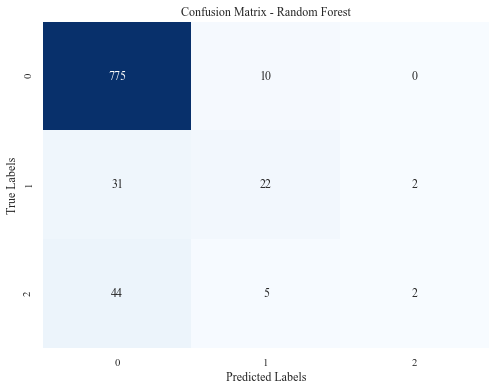

Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       785
           1       0.32      0.40      0.36        55
           2       0.07      0.08      0.07        51

    accuracy                           0.81       891
   macro avg       0.44      0.46      0.44       891
weighted avg       0.83      0.81      0.82       891



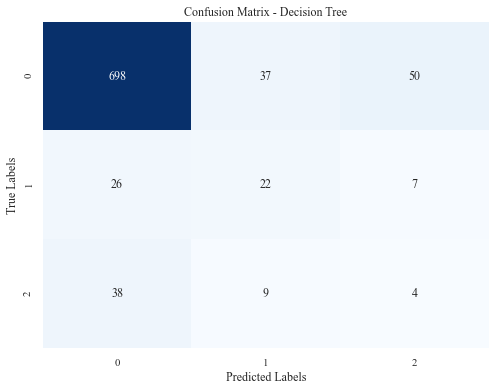

Classifier: Gradient Boosting
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       785
           1       0.57      0.36      0.44        55
           2       0.14      0.02      0.03        51

    accuracy                           0.89       891
   macro avg       0.54      0.46      0.47       891
weighted avg       0.84      0.89      0.86       891



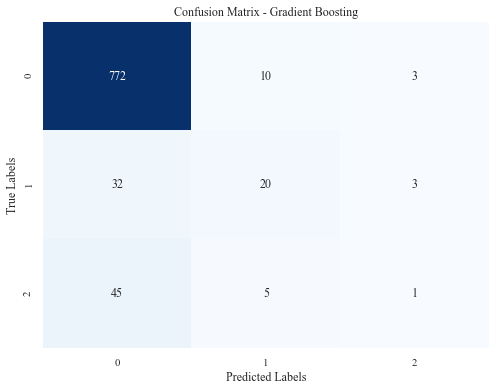

Classifier: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       785
           1       0.48      0.45      0.47        55
           2       0.07      0.04      0.05        51

    accuracy                           0.87       891
   macro avg       0.49      0.48      0.48       891
weighted avg       0.84      0.87      0.85       891



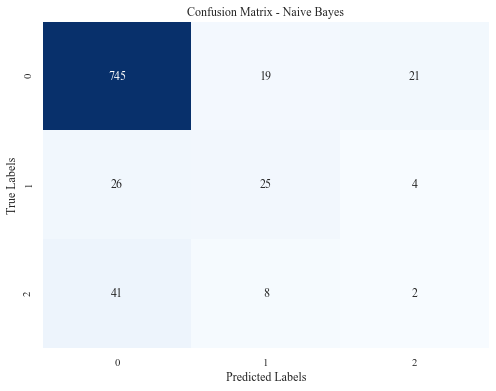

Classifier: Neural Network
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       785
           1       0.51      0.33      0.40        55
           2       0.00      0.00      0.00        51

    accuracy                           0.89       891
   macro avg       0.47      0.44      0.45       891
weighted avg       0.83      0.89      0.85       891



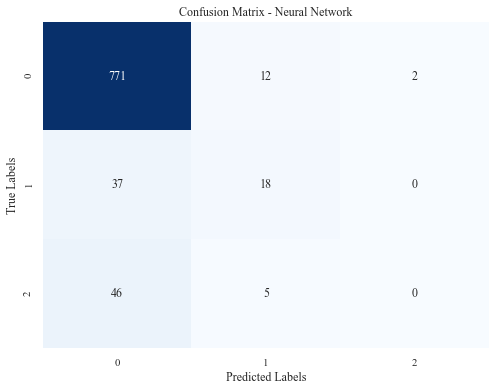

In [53]:
# Make predictions for each classifier
classifiers = [
    ("Random Forest", rf_classifier),
    ("Decision Tree", dt_classifier),
    ("Gradient Boosting", gb_classifier),
    ("Naive Bayes", nb_classifier),
    ("Neural Network", nn_classifier)
]

for name, classifier in classifiers:
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()